In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../../mta_1706.csv',error_bad_lines=False)

b'Skipping line 373496: expected 24 fields, saw 30\n'


In [8]:
df.RecordedAtTime.head()

0    2017-06-01 00:03:40
1    2017-06-01 00:03:52
2    2017-06-01 00:03:45
3    2017-06-01 00:03:23
4    2017-06-01 00:03:43
Name: RecordedAtTime, dtype: object

In [9]:
from datetime import datetime, date, time

In [11]:
date = df.RecordedAtTime[0]
date

'2017-06-01 00:03:40'

In [12]:
d = datetime.strptime(date,'%Y-%m-%d %H:%M:%S')

In [14]:
t = d.time()

In [15]:
d

datetime.datetime(2017, 6, 1, 0, 3, 40)

In [16]:
t

datetime.time(0, 3, 40)

In [17]:
df1 = df.sample(100)

In [19]:
df1.shape

(100, 24)

In [24]:
def to_datetime(dt):
    return datetime.strptime(dt,'%Y-%m-%d %H:%M:%S')

In [25]:
def datetime_to_time(dt):
    return dt.time()

In [26]:
df1['datetime'] = df1.RecordedAtTime.apply(to_datetime)

In [27]:
df1['time'] = df1.datetime.apply(datetime_to_time)

In [28]:
df1.head()

,RecordedAtTime,DirectionRef,JourneyPatternRef,PublishedLineName,OriginRef,DestinationRef,DestinationName,Bearing,ProgressRate,BlockRef,...,ExpectedArrivalTime,ArrivalProximityText,DistanceFromStop,NumberOfStopsAway,StopPointRef,VisitNumber,StopPointName,ScheduledArrivalTime,datetime,time
241496,2017-06-13 06:33:19,1,MTA_Q100466,Q10,MTA_550349,MTA_505238,JFK AIRPORT CENTRAL TERMINAL via LEFFERTS BL v...,245.942660,normalProgress,MTABC_JKPB7-JK_B7-Weekday-10-SDon_2997653,...,2017-06-13 06:33:39,approaching,49.0,0.0,550342.0,1.0,LEFFERTS BL /84 AV,06:33:46,2017-06-13 06:33:19,06:33:19
949891,2017-06-29 13:00:45,1,MTA_M1000064,M100,MTA_404028,MTA_903109,E HARLM 1 AV-125 ST via BDWY via AMSTRDM,122.735230,normalProgress,MTA NYCT_KB_B7-Weekday_C_KB_16800_M100-303,...,NaN,approaching,104.0,0.0,405442.0,1.0,DYCKMAN ST/SHERMAN AV,12:59:20,2017-06-29 13:00:45,13:00:45
743003,2017-06-19 13:24:18,0,MTA_SBS120139,Bx12-SBS,MTA_402611,MTA_902058,SELECT BUS SERVICE BAY PLAZA CO-OP CITY,358.690600,normalProgress,MTA NYCT_GH_B7-Weekday-SDon_E_GH_43680_SBS12-210,...,2017-06-19 13:24:58,approaching,117.0,0.0,100796.0,1.0,W FORDHAM RD/UNIVERSITY AV,13:20:02,2017-06-19 13:24:18,13:24:18
228974,2017-06-12 14:32:46,1,MTA_M010162,M1,MTA_405284,MTA_403793,E VILLAGE 8 ST via 5 AV,72.777670,noProgress,MTA NYCT_OF_F7-Weekday-SDon_E_OF_45780_M1-102,...,2017-06-12 14:33:13,at stop,0.0,0.0,403793.0,1.0,4 AV/E 9 ST,14:12:00,2017-06-12 14:32:46,14:32:46
264709,2017-06-14 07:15:50,0,MTA_Q100333,Q10,MTA_505238,MTA_550349,LIMITED to KEW GARDENS UNION TPK STA via LEFFE...,71.517975,normalProgress,MTABC_JKPB7-JK_B7-Weekday-10-SDon_2997667,...,NaN,approaching,126.0,0.0,550309.0,1.0,LEFFERTS BL /ROCKAWAY BL,07:18:00,2017-06-14 07:15:50,07:15:50


In [31]:
df.iloc[0]

RecordedAtTime                                         2017-06-01 00:03:40
DirectionRef                                                             0
JourneyPatternRef                                              MTA_M010166
PublishedLineName                                                       M1
OriginRef                                                       MTA_400001
DestinationRef                                                  MTA_803003
DestinationName                                  HARLEM 147 ST via MADISON
Bearing                                                            53.6001
ProgressRate                                                normalProgress
BlockRef                     MTA NYCT_OF_F7-Weekday-SDon_E_OF_25500_M1-113
VehicleRef                                                   MTA NYCT_3831
OriginAimedDepartureTime                                               NaN
ProgressStatus                                                         NaN
DatedVehicleJourneyRef   

# Taxi

In [163]:
taxi = pd.read_csv('../../chicago_taxi_trips_2016_01.csv')

In [164]:
taxi = taxi.sample(10000)

In [165]:
taxi.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
69636,2147.0,2016-1-25 20:00:00,2016-1-25 20:15:00,540.0,1.70,NaN,792.0,8.0,8.0,8.00,0.0,0.0,0.0,8.00,Cash,107.0,474.0,204.0,419.0,615.0
1002533,2297.0,2016-1-7 18:15:00,2016-1-7 18:30:00,1260.0,0.20,NaN,147.0,8.0,6.0,15.75,4.7,0.0,0.0,20.45,Credit Card,107.0,688.0,206.0,359.0,46.0
1329685,4049.0,2016-1-5 10:45:00,2016-1-5 11:00:00,720.0,2.80,NaN,NaN,24.0,28.0,10.75,0.0,0.0,0.0,10.75,Cash,107.0,199.0,510.0,158.0,270.0
1473663,6764.0,2016-1-24 00:15:00,2016-1-24 00:15:00,0.0,0.03,NaN,NaN,8.0,8.0,3.25,0.0,0.0,0.0,3.25,Cash,NaN,599.0,346.0,599.0,346.0
408979,1320.0,2016-1-10 03:30:00,2016-1-10 03:30:00,0.0,0.00,NaN,NaN,NaN,NaN,7.00,2.0,0.0,0.0,9.00,Credit Card,119.0,NaN,NaN,NaN,NaN


In [166]:
test = taxi.tips>0

In [167]:
test.mean()

0.43090000000000001

In [168]:
taxi['datetime'] = taxi.trip_start_timestamp

In [169]:
def to_dt(s):
    return datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')

In [170]:
taxi['datetime'] = taxi['datetime'].apply(to_dt)

In [171]:
taxi.datetime.head()

69636     2016-01-25 20:00:00
1002533   2016-01-07 18:15:00
1329685   2016-01-05 10:45:00
1473663   2016-01-24 00:15:00
408979    2016-01-10 03:30:00
Name: datetime, dtype: datetime64[ns]

In [172]:
def dt_to_time(dt):
    return dt.time()

In [173]:
taxi['time'] = taxi.datetime.apply(dt_to_time)

In [174]:
taxi.time.head()

69636      20:00:00
1002533    18:15:00
1329685    10:45:00
1473663    00:15:00
408979     03:30:00
Name: time, dtype: object

In [175]:
import seaborn as sns

In [176]:
small_taxi=taxi.iloc[:1000]
small_taxi.datetime.head()

69636     2016-01-25 20:00:00
1002533   2016-01-07 18:15:00
1329685   2016-01-05 10:45:00
1473663   2016-01-24 00:15:00
408979    2016-01-10 03:30:00
Name: datetime, dtype: datetime64[ns]

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
# does not work
#plt.scatter(small_taxi['datetime'],small_taxi.tips)

In [179]:
import datetime
y = [ 2,4,6,8,10,12,14,16,18,20 ]
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(len(y))]

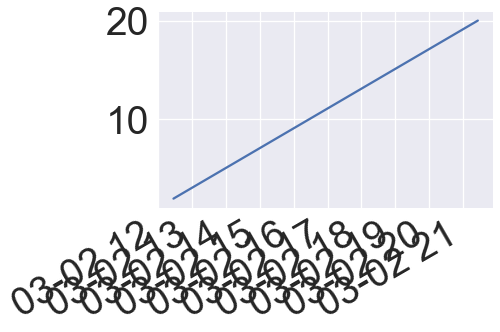

In [180]:
plt.plot(x,y)
plt.gcf().autofmt_xdate()

In [181]:
s = pd.Series(small_taxi.tips,index=small_taxi.time)

In [182]:
s0 = small_taxi[['tips','time']]

In [183]:
s0.set_index('time',inplace=True);

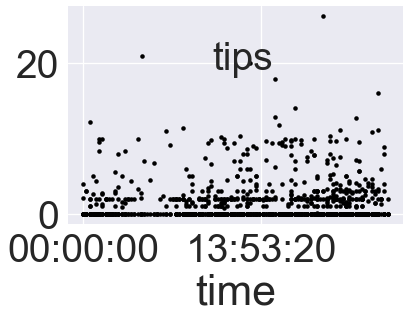

In [184]:
s0.plot(style='k.')

In [185]:
s1 = s0.where(s0==0,1)

In [186]:
s1.head()

,tips
time,
20:00:00,0.0
18:15:00,1.0
10:45:00,0.0
00:15:00,0.0
03:30:00,1.0


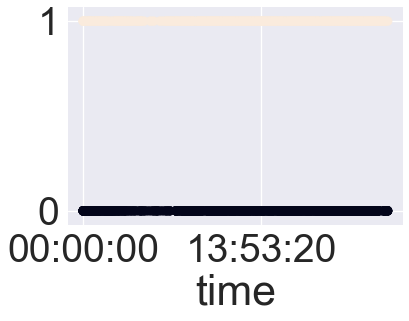

In [187]:
plt.scatter(s1.index,s1.tips,c=s1.tips)

In [188]:
small_taxi.time.head()

69636      20:00:00
1002533    18:15:00
1329685    10:45:00
1473663    00:15:00
408979     03:30:00
Name: time, dtype: object

In [189]:
def time_to_float(t):
    return t.hour+t.minute/60

In [190]:
small_taxi = small_taxi.copy()

In [191]:
small_taxi['float_time'] = small_taxi.time.apply(time_to_float)

In [192]:
small_taxi['y_value']=0.5

In [193]:
small_taxi.float_time.head()

69636      20.00
1002533    18.25
1329685    10.75
1473663     0.25
408979      3.50
Name: float_time, dtype: float64

In [194]:
small_taxi.y_value.head()

69636      0.5
1002533    0.5
1329685    0.5
1473663    0.5
408979     0.5
Name: y_value, dtype: float64

In [195]:
sns.set()
sns.set_context("talk",font_scale=3)
palette = sns.color_palette("Set1")

In [196]:
small_taxi['tipped']=small_taxi.tips>0

In [197]:
def f(b):
    if b: return 1
    else: return 0
small_taxi['tipped']= small_taxi['tipped'].apply(f)

In [198]:
small_taxi['y_value']=0

In [199]:
small_taxi.reset_index(inplace=True)

In [200]:
small_taxi.tips.head()

0    0.0
1    4.7
2    0.0
3    0.0
4    2.0
Name: tips, dtype: float64

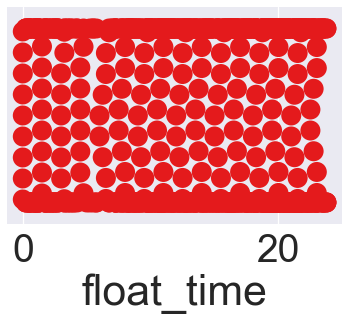

In [201]:
plt.figure()
sns.swarmplot(x='float_time', hue='tips',data=small_taxi,size=20,palette=palette)

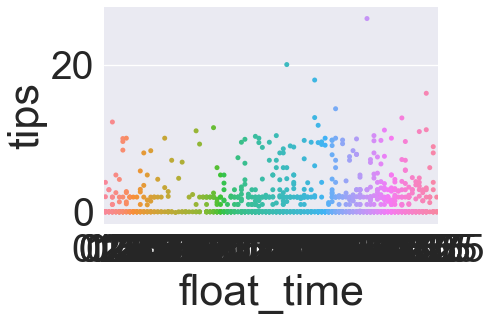

In [202]:
sns.stripplot(x='float_time',y='tips',data=small_taxi)

In [203]:
small_taxi['dummy']=0

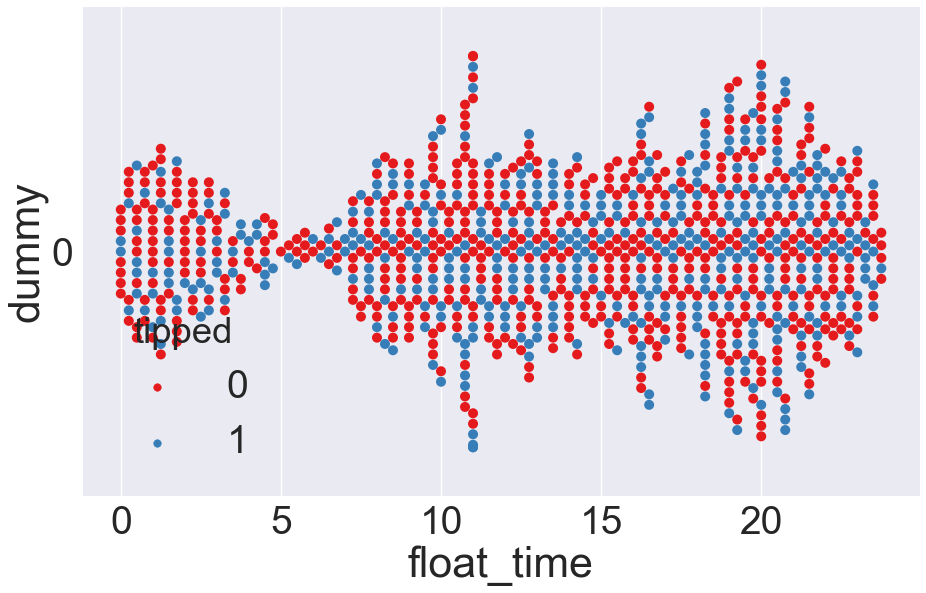

In [214]:
plt.figure(figsize=(15,9))
sns.swarmplot(x='float_time',y='dummy',hue='tipped',data=small_taxi,size=10,orient='h',dodge=False,palette=palette)

In [113]:
type(small_taxi)

pandas.core.frame.DataFrame

In [97]:
tips = sns.load_dataset("tips")

In [140]:
small_taxi.tipped.head(50);

In [132]:
def to_col(v):
    if v==0: return palette[0]
    else: return palette[1]
small_taxi['color']=small_taxi.tipped.apply(to_col)

In [151]:
small_taxi.tips.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    2.0
6    3.0
7    0.0
8    0.0
9    0.0
Name: tips, dtype: float64

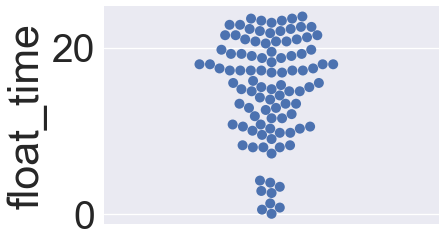

In [155]:
sns.swarmplot(y=small_taxi.float_time,hue=small_taxi.tipped,size=10,dodge=False)

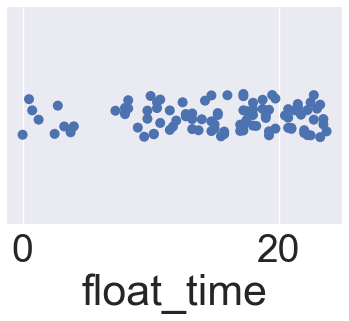

In [142]:
sns.stripplot(x=small_taxi.float_time,hue=small_taxi.tipped,size=10,jitter=True)

# Energy
From https://www.drivendata.org/competitions/51/electricity-prediction-machine-learning/data/

In [401]:
energy = pd.read_csv('../../train.csv')

In [410]:
energy = energy.sample(50000)

In [411]:
#energy = energy.iloc[10000:]

In [412]:
energy.dropna(subset=['Value'],inplace=True);

In [413]:
energy.shape

(50000, 5)

In [414]:
energy.head()

,obs_id,SiteId,Timestamp,ForecastId,Value
1784876,966749,89,2016-08-17 20:00:00,1894,23.016301
1251730,4692850,59,2016-05-21 02:00:00,1331,4472.441295
4793584,4397287,235,2016-08-27 06:15:00,5085,151964.363946
1877516,5694953,98,2015-04-25 22:45:00,1993,142009.812178
5705714,6807993,276,2015-08-07 02:05:00,6054,3977.413633


In [415]:
energy.Value.mean()

141793.9567816299

In [416]:
import datetime

In [417]:
def to_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')

In [418]:
energy['datetime'] = energy.Timestamp.apply(to_datetime)

In [419]:
def datetime_to_time(dt):
    return dt.time()

In [420]:
energy['time']=energy.datetime.apply(datetime_to_time)

In [421]:
def time_to_float(t):
    return t.hour+t.minute/60
def time_to_hour(t):
    return t.hour

In [422]:
energy['time_float'] = energy.time.apply(time_to_float)
energy['hour']=energy.time.apply(time_to_hour)

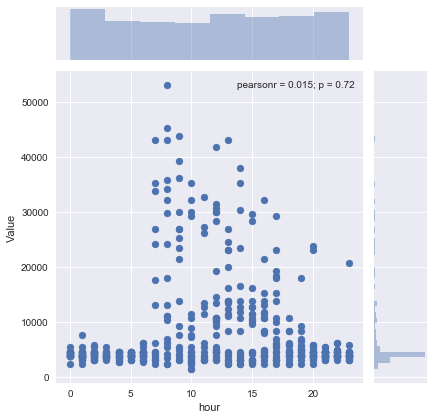

In [445]:
sns.jointplot(x='hour',y='Value',data=energy[energy.SiteId==19])

In [379]:
grouped = energy.groupby('hour')

In [380]:
a = grouped.mean()

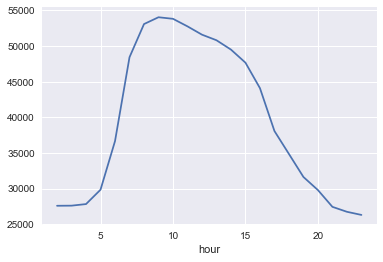

In [382]:
a.iloc[2:].Value.plot()

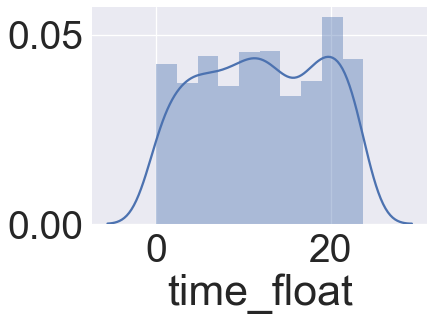

In [332]:
sns.distplot(energy.time_float)

In [333]:
energy.head()

,obs_id,SiteId,Timestamp,ForecastId,Value,datetime,time,time_float
33180,6851649,2,2017-05-29 01:00:00,38,36784.019737,2017-05-29 01:00:00,01:00:00,1.00
47008,7106328,6,2013-05-06 01:00:00,53,25803.254470,2013-05-06 01:00:00,01:00:00,1.00
14069,5392677,2,2014-10-15 18:00:00,18,105258.405911,2014-10-15 18:00:00,18:00:00,18.00
28028,7244630,2,2016-09-16 09:00:00,33,82800.302650,2016-09-16 09:00:00,09:00:00,9.00
53771,2414267,6,2013-07-29 11:45:00,60,61890.750399,2013-07-29 11:45:00,11:45:00,11.75


In [340]:
energy.Value.mean()
sns.set()

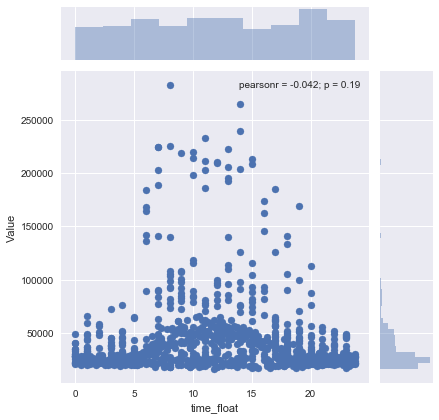

In [341]:
sns.jointplot(x='time_float',y='Value',data=energy)

In [338]:
energy= energy[energy.Value <8e5]

In [319]:
energy

,obs_id,SiteId,Timestamp,ForecastId,Value
52688,6675265,6,2013-07-16 05:00:00,59,29092.358720
96278,7283716,6,2015-01-11 06:30:00,104,17418.354903
87342,3145326,6,2014-09-22 04:30:00,95,21124.387861
75669,1124930,6,2014-04-29 14:15:00,83,39005.996883
17558,2407025,2,2015-04-11 03:00:00,22,30536.731254
85878,54387,6,2014-09-02 22:30:00,93,25201.024114
28849,3120667,2,2016-10-20 14:00:00,33,75314.798515
30029,4610286,2,2016-12-24 18:00:00,35,16856.171717
36042,7640007,5,2013-01-01 20:30:00,42,22984.546487
40152,4973845,6,2013-02-09 15:00:00,46,26683.437298


# Iris

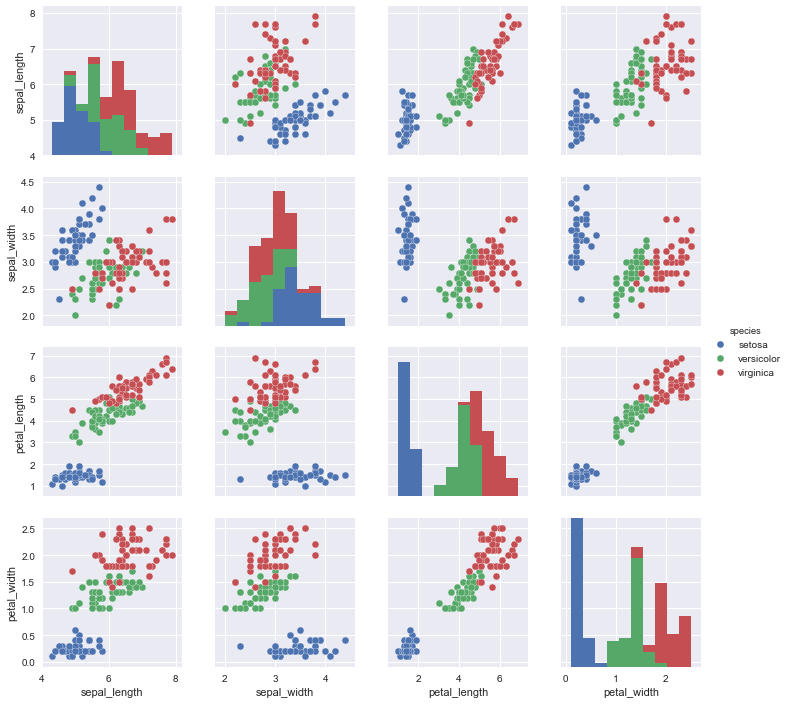

In [504]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

In [505]:
iris_dummies = pd.get_dummies(iris,columns=['species'])

In [506]:
iris_dummies.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [507]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [508]:
iris['is_setosa']=(iris.species=='setosa')
iris['is_versicolor']= (iris.species=='versicolor')

In [509]:
iris['dummy']=1

In [510]:
iris_ordered = pd.concat([iris[iris.species=='setosa'],iris[iris.species!='setosa']])

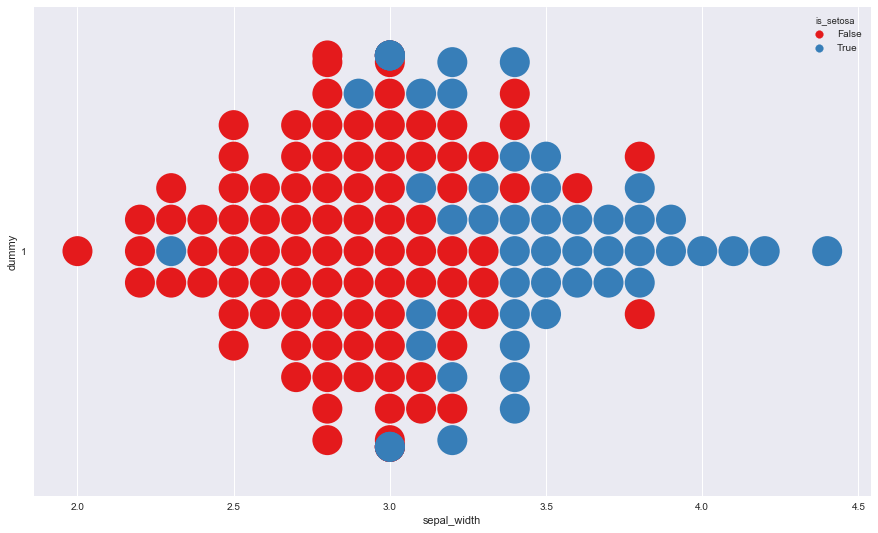

In [511]:
plt.figure(figsize=(15,9))
sns.swarmplot(x='sepal_width',y='dummy',hue='is_setosa',data=iris_ordered,size=30,orient='h',dodge=False,palette=palette)

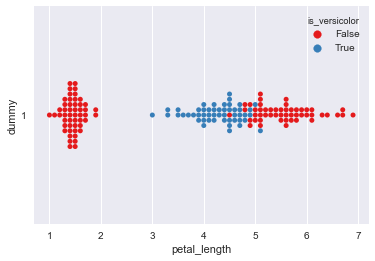

In [512]:
plt.figure()
sns.swarmplot(x='petal_length',y='dummy',hue='is_versicolor',data=iris,size=5,orient='h',dodge=False,palette=palette)

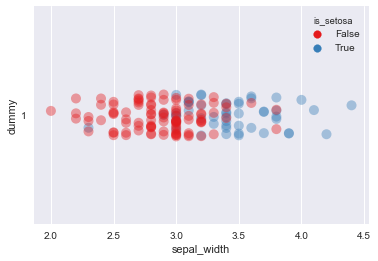

In [513]:
plt.figure()
sns.stripplot(x='sepal_width',y='dummy',hue='is_setosa',data=iris,size=10,jitter=0.1,alpha=.4,orient='h',palette=palette)

/Users/florentmartin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


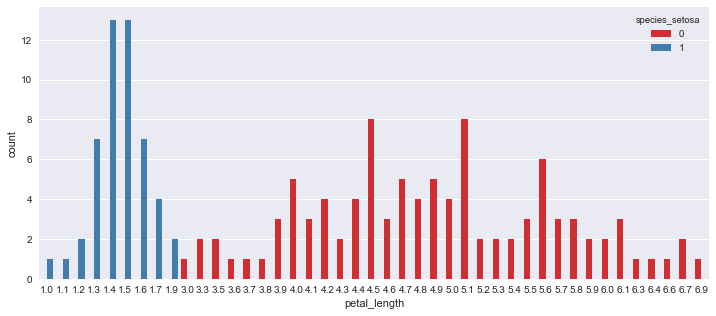

In [522]:
plt.figure(figsize=(12,5))
sns.countplot(x='petal_length',hue='species_setosa',data=iris_dummies,saturation=0.8,palette=palette)

In [515]:
sns.countplot(x='')

ValueError: Could not interpret input ''